In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdfkit
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

In [2]:
# Load data
data = pd.read_csv('malaysia_parcel_volumes_2.csv')
X = data.index.values.reshape(-1, 1)
y = data['Parcel Volume']

In [3]:
# ARIMA model
arima_model = ARIMA(y, order=(2, 0, 0))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=1, end=len(y), typ='levels')

C:\Users\admin\anaconda3.1\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [4]:
# Polynomial model
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

poly_predictions = poly_model.predict(X_poly)

In [5]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X, y)

rf_predictions = rf_model.predict(X)

In [6]:
# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X, y)

xgb_predictions = xgb_model.predict(X)

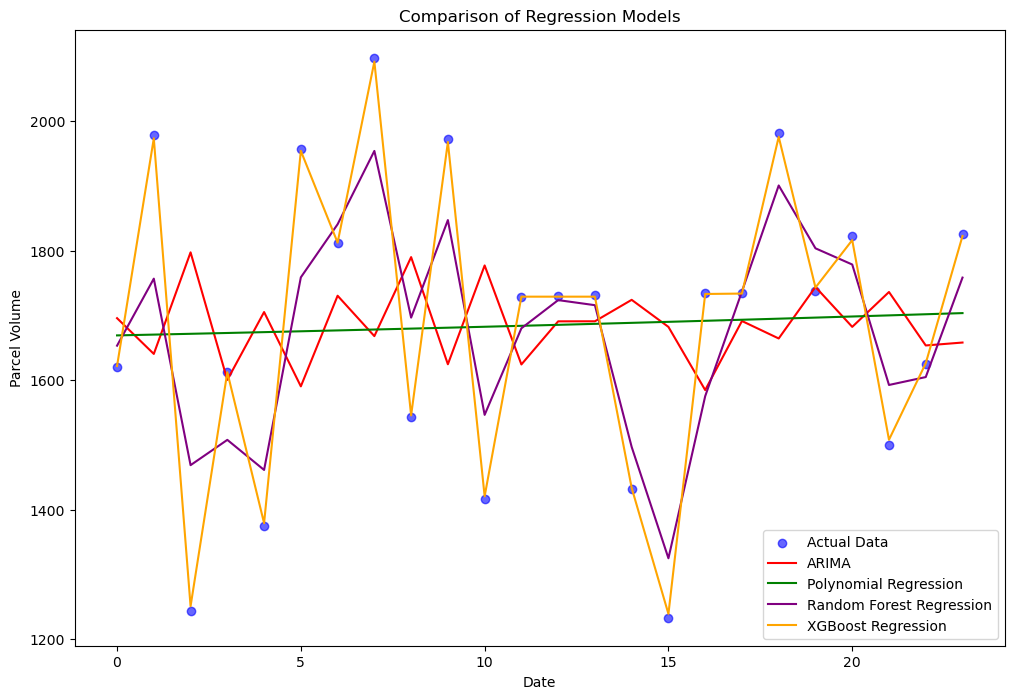

In [7]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X, arima_predictions, color='red', label='ARIMA')
plt.plot(X, poly_predictions, color='green', label='Polynomial Regression')
plt.plot(X, rf_predictions, color='purple', label='Random Forest Regression')
plt.plot(X, xgb_predictions, color='orange', label='XGBoost Regression')
plt.xlabel('Date')
plt.ylabel('Parcel Volume')
plt.title('Comparison of Regression Models')
plt.legend()
plt.show()

In [8]:
# Calculate evaluation metrics
arima_mse = mean_squared_error(y, arima_predictions)
arima_mae = mean_absolute_error(y, arima_predictions)

poly_mse = mean_squared_error(y, poly_predictions)
poly_mae = mean_absolute_error(y, poly_predictions)

rf_mse = mean_squared_error(y, rf_predictions)
rf_mae = mean_absolute_error(y, rf_predictions)

xgb_mse = mean_squared_error(y, xgb_predictions)
xgb_mae = mean_absolute_error(y, xgb_predictions)

In [9]:
# Print evaluation metrics
print("Arima Model:")
print("MSE:", arima_mse)
print("MAE:", arima_mae)

print("\nPolynomial Regression:")
print("MSE:", poly_mse)
print("MAE:", poly_mae)

print("\nRandom Forest Regression:")
print("MSE:", rf_mse)
print("MAE:", rf_mae)

print("\nXGBoost Regression:")
print("MSE:", xgb_mse)
print("MAE:", xgb_mae)

Arima Model:
MSE: 71000.28888487934
MAE: 214.94555840099397

Polynomial Regression:
MSE: 52735.54559085841
MAE: 185.65523411371237

Random Forest Regression:
MSE: 12627.590174999996
MAE: 92.08666666666666

XGBoost Regression:
MSE: 17.228297593072057
MAE: 3.4037628173828125


C:\Users\admin\anaconda3.1\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Next 3 months predictions:

ARIMA:
24    1658.063703
25    1719.383431
26    1676.845629
Name: predicted_mean, dtype: float64

Polynomial Regression:
[1705.32608696 1707.14956522 1708.99812709]

Random Forest Regression:
[1749.18 1749.18 1749.18]

XGBoost Regression:
[1822.6031 1822.6031 1822.6031]


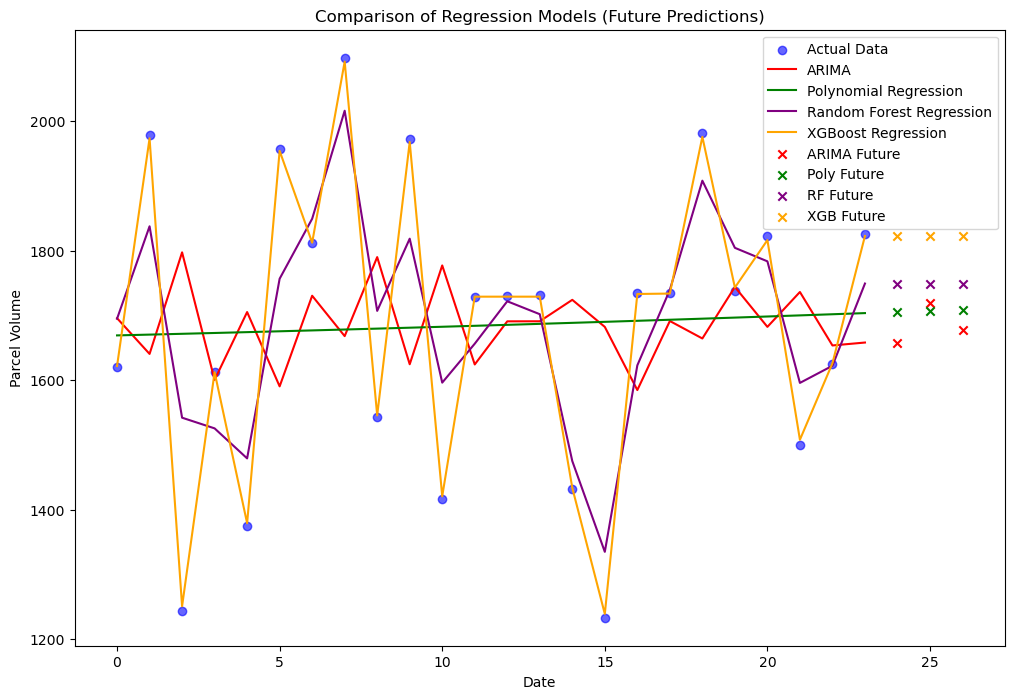

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# Load data
data = pd.read_csv('malaysia_parcel_volumes_2.csv')
X = data.index.values.reshape(-1, 1)
y = data['Parcel Volume']

# Generate future dates (assuming monthly intervals)
future_X = np.arange(len(X), len(X) + 3).reshape(-1, 1)

# ARIMA model
arima_model = ARIMA(y, order=(2, 0, 0))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=1, end=len(y), typ='levels')
arima_future = arima_model_fit.forecast(steps=3)

# Polynomial model
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
future_X_poly = poly_features.transform(future_X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

poly_predictions = poly_model.predict(X_poly)
poly_future = poly_model.predict(future_X_poly)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X, y)

rf_predictions = rf_model.predict(X)
rf_future = rf_model.predict(future_X)

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X, y)

xgb_predictions = xgb_model.predict(X)
xgb_future = xgb_model.predict(future_X)

# Print predictions for the next 3 months
print("Next 3 months predictions:")
print("\nARIMA:")
print(arima_future)

print("\nPolynomial Regression:")
print(poly_future)

print("\nRandom Forest Regression:")
print(rf_future)

print("\nXGBoost Regression:")
print(xgb_future)

# Plot the results including future predictions
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X, arima_predictions, color='red', label='ARIMA')
plt.plot(X, poly_predictions, color='green', label='Polynomial Regression')
plt.plot(X, rf_predictions, color='purple', label='Random Forest Regression')
plt.plot(X, xgb_predictions, color='orange', label='XGBoost Regression')

# Plot future predictions
plt.scatter(future_X, arima_future, color='red', label='ARIMA Future', marker='x')
plt.scatter(future_X, poly_future, color='green', label='Poly Future', marker='x')
plt.scatter(future_X, rf_future, color='purple', label='RF Future', marker='x')
plt.scatter(future_X, xgb_future, color='orange', label='XGB Future', marker='x')

plt.xlabel('Date')
plt.ylabel('Parcel Volume')
plt.title('Comparison of Regression Models (Future Predictions)')
plt.legend()
plt.show()